Main file for using the Quantum Register Simulator

In [2]:
# importing all the necessary files
from register.QuantumRegister import *
from register.grovers import *
from register.deutsch import * 
from register.deutschJozsa import * 

To create a quantum register, simply call the class and initialise with the number of qubits required for the register. The number of states will be 2**(number of qubits). A specific state can be initialised by using state = (index of state), however this is automatically initialised as state 0 if not given.


In [3]:
reg = QuantumRegister(3)
print(f"State Vector: {reg.state_}")
print(f"Number of qubits: {reg.n_qubits_}")
print(f"Number of states: {reg.n_states_}")
print(f"Register in State: {reg.measureState()}")


State Vector: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Number of qubits: 3
Number of states: 8
Register in State: 0


The class stores several basic gates, including the hadamard, and the pauli X, Y and Z gates. This makes a universal set of gates, and so any quantum circuit can be made by using these gates. 

In [4]:
hadamard = reg.hadamard
pauli_x = reg.pauli_x 

print(f"Hadamard gate matrix:\n {hadamard},\n\n pauli X (NOT) gate matrix:\n {pauli_x}")

Hadamard gate matrix:
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]],

 pauli X (NOT) gate matrix:
 [[0 1]
 [1 0]]


A gate is applied to a target qubit by using the applyGate function. This takes in a 2x2 unitary gate, the index of a target qubit and optionally the index of multiple control qubits, as either an integer for a singular control qubit, or a tuple of integers. This implementation allows for any 2x2 unitary gate to be applied to the register, and so even if the gate isnt stored in the class, it can be applied to the register. 

In [5]:
reg = QuantumRegister(2)
print(f"Initialised State:\n {reg.state_}\n")
reg.applyGate(gate = reg.hadamard, target = 0)
print(f"After applying hadamard to qubit 0:\n{reg.state_}\n")
reg.applyGate(gate = reg.pauli_x, target = 1, control = 0)
print(f"After applying controlled pauli X (not) gate to qubit 1, with control qubit 0:\n{reg.state_}\n")

#apply Toffoli gate
reg = QuantumRegister(3)
reg.state_ = np.array([0.5, 0.5, 0, 0, 0.5, 0, 0.5, 0])
print(f"State before applying Toffoli gate (C-C-NOT):\n{reg.state_}\n")
reg.applyGate(gate = reg.pauli_x, target = 0, control = (1, 2))
print(f"State after applying Toffoli gate to qubit 0, with control qubits 1 and 2:\n{reg.state_}\n")

Initialised State:
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

After applying hadamard to qubit 0:
[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]

After applying controlled pauli X (not) gate to qubit 1, with control qubit 0:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

State before applying Toffoli gate (C-C-NOT):
[0.5 0.5 0.  0.  0.5 0.  0.5 0. ]

State after applying Toffoli gate to qubit 0, with control qubits 1 and 2:
[0.5 0.5 0.  0.  0.5 0.  0.  0.5]



The state can be measured using the measureState function, however this will collapse the state vector. This is probablistic and so the state may collapse into a state that wasn't the most probable. 

In [6]:
register = QuantumRegister(3)
register.setEqualSuperposition()
print(register.state_)
state = register.measureState()
print(register.state_)
print(f"State: {state}")

[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
State: 7


The probability of any given state can be found using the getStateProbability function, this wont collapse the state vector. This function either takes in the index of the state, or a bitstring representing the qubits binary state. 

In [7]:
reg = QuantumRegister(3)
reg.setEqualSuperposition()
print(reg.state_)
print(f"Probability of state 1: {reg.getStateProbability(1)}")

[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
Probability of state 1: 0.12499999999999994


Because collapsing the state is probablistic when the register is entangled, the returned state may not be the most probable. Using the measureStateNTimes function, which intakes an integer n, it will collapse the state n times and count how many times it collapses into each state. This returns a vector of length n_states_ where the value at each index represents the number of times the state collapsed into that state. 

In [8]:
reg = QuantumRegister(3)
reg.setEqualSuperposition()
counts = reg.measureStateNTimes(8000)
print(counts)

[1024.  970.  993.  999. 1003.  970. 1036. 1005.]


A specified qubit can be measured using the function measureQubitState. This function takes in the target qubit that is being measured, and then returns 0 or 1 depending on which state the qubit collapsed into. This function also partly collapses the state, so the probabilities are adjusted depending on what state the qubit collapses into.

In [35]:

reg = QuantumRegister(3)
reg.setEqualSuperposition()
reg.measureQubitState(target = i)
print(reg.state_)
qubit_state = reg.measureQubitState(target = 0)
print(f"Qubit state: {qubit_state}\nNew state vector: {reg.state_}")

[0.5 0.5 0.5 0.5 0.  0.  0.  0. ]
Qubit state: 1
New state vector: [0.         0.70710678 0.         0.70710678 0.         0.
 0.         0.        ]


Another class has been created to run Deutsch's Algorithm. This class is initialised with a register of 2 qubits, and a balanced or constant oracle function.  

In [ ]:
# balanced oracle function
#def balanced(register):
#	def oracle(a):
#		return a % 2
#	for i in range(register.n_states_):
#		register.state_[i] *= (-1) ** oracle(i)
#	return register.state_

# def constant(register):
# 	def oracle(a):
# 		return 0
# 	for i in range(register.n_states_):
# 		register.state_[i] *= (-1) ** oracle(i) 
# 	return register.state_


def balanced(register):
	
    def oracle(a):
	    return a%2
	
    for i in range(register.n_states_):
	    register.state_[i] *= (-1) ** oracle(i)
    
    return register.state_

#constant oracle function
def constant(register):
	def oracle(a):
		return 0
	for i in range(register.n_states_):
		register.state_[i] *= (-1) ** oracle(i)
	return register.state_


def deutschMain():
	# This function is used to run the deutsch algorithm, it uses examples for both balanced and constant functions
	# The deutsch algorithm is used to evaluate a black box algorithm using a basic quantum circuit, for all constant 
	# functions our implementation will return false and for all balanced, True

	register = QuantumRegister(2)

	deutschBalanced = Deutsch(balanced, register)
	is_balanced_one = deutschBalanced.deutschAlgorithm()
	print(f"Is balanced (Balanced Oracle): {is_balanced_one}")

	register = QuantumRegister(2)
	deutschConstant = Deutsch(constant, register)
	is_balanced_two = deutschConstant.deutschAlgorithm()
	print(f"Is balanced (Constant Oracle): {is_balanced_two}")
	print("DONE DEUTSCH")
	
deutschMain()

The Deutsch-Josza Algorithm is an N qubit register implementation of Deutsch's algorithm. This class takes a register of N qubits, and a balanced or constant oracle. 

In [36]:
def balanced(register):
	
    def oracle(a):
	    return a%2
	
    for i in range(register.n_states_):
	    register.state_[i] *= (-1) ** oracle(i)
    
    return register.state_

#constant oracle function
def constant(register):
	def oracle(a):
		return 0
	for i in range(register.n_states_):
		register.state_[i] *= (-1) ** oracle(i)
	return register.state_

def dJMain(n_qubits):
	# This function is used to run the deutsch algorithm, it uses examples for both balanced and constant functions
	# The deutsch algorithm is used to evaluate a black box algorithm using a basic quantum circuit, for all constant 
	# functions our implementation will produce a 0 and for all balanced, a 1

	register = QuantumRegister(n_qubits)

	dJBalanced = DeutschJozsa(balanced,register)
	is_balanced_one = dJBalanced.deutschJozsaAlgorithm()
	print(f"Is balanced (Balanced Oracle): {is_balanced_one}")

	register = QuantumRegister(n_qubits)
	
	dJConstant = DeutschJozsa(constant,register)
	is_balanced_two = dJConstant.deutschJozsaAlgorithm()
	print(f"Is balanced (Constant Oracle): {is_balanced_two}")
	print("DONE DJ")

dJMain(10)

Is balanced (Balanced Oracle): True
Is balanced (Constant Oracle): False
DONE DJ


The Grovers class takes in an oracle, an unordered list to search, and a register where $register.n\_states >= len(list)$

In [23]:
def groverMain(list_Len, target):

	n_qubits = int(np.ceil(np.log2(list_Len)))
	register = QuantumRegister(n_qubits)
	print(f"Number of qubits: {register.n_qubits_}")

	# grovers algorithm is an algorithm to sort a list using an oracle
	# our implementation selects the appropriate qubit number number from the list size
	# It can operate efficiently in under two seconds up to 21 qubits in size

	groverList = np.random.randint(low = list_Len, size = list_Len)

	def groverOracle(register):

		def oracle(a):
			
			bit = 0
			if a == target:
				bit = 1
			return bit
		
		for i in range(register.n_states_):
			register.state_[i] *= (-1) ** oracle(i)
		return register.state_

	groverExample = Grovers(groverOracle, groverList, register)
	groverExample.groversAlgorithm()
	print(f"Probability of target state: {abs(groverExample.register.state_[target])**2}")
	print(f"Probability greater than (1 - 1/N): {abs(groverExample.register.state_[target])**2 >= (1-(1/groverExample.n_states_))}")
	print(f"State measured: {groverExample.register.measureState()}")
	print("DONE GROVERS")
	
length = 10000
target = np.random.randint(low = length)
print(f"Target Index: {target}")
groverMain(length, target)


Target Index: 2885
Number of qubits: 14
Probability of target state: 0.9999997811142223
Probability greater than (1 - 1/N): True
State measured: 2885
DONE GROVERS


An example Oracle implementation is using the controlled Pauli Z gate. If the control qubits are every other qubit, then the last state in the list is flipped.

In [6]:
def oracle(register):
    register.applyGate(gate = register.pauli_z, target = 0, control = (1, 2))
    return register.state_

reg = QuantumRegister(3)
reg.setEqualSuperposition()
print(reg.state_)
reg.state_ = oracle(reg)
print(reg.state_)

[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
  0.35355339 -0.35355339]


An animation to show how the amplitudes of each state behaves as the oracle and diffusion operators are applied to the gate can be created using the following code. The target states amplitude is first flipped, and then all the probabilities are flipped by the mean, and so the probability of the target state increases with each iteration.

Wanted state is: 1001


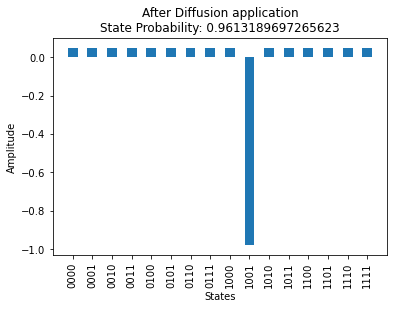

In [18]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import random


qubits = 4
wanted_state = random.randint(0, 2**qubits)
print(f"Wanted state is: {format(wanted_state, '0%ib' % qubits)}")
def oracle(register):
    for i in range(register.n_states_):
        if i == wanted_state:
            register.state_[i] *= -1
    return register.state_ 

    
arr = np.arange(2**qubits) 
register = QuantumRegister(qubits)
grovers = Grovers(oracle, arr, register)
labels = [format(i, '0%ib' % grovers.n_qubits_) for i in range(grovers.n_states_)]
j = 0
amplitudes = np.zeros((grovers.iterations * 2 + 1, grovers.n_states_))
grovers.register.setEqualSuperposition()
for i in range(grovers.n_states_):
    amplitudes[j, i] = grovers.register.state_[i].real 
j += 1    
for i in range(grovers.iterations):
    grovers.applyOracle()
    for p in range(grovers.n_states_):
        amplitudes[j, p] = grovers.register.state_[p].real
    j += 1
    grovers.flipByMean()
    for m in range(grovers.n_states_):
        amplitudes[j, m] = grovers.register.state_[m].real
    j += 1

    
def animation(i):
    fig.clear()
    if i % 2 != 0:
        plt.title(f"After Oracle application\nState Probability: {amplitudes[i, wanted_state]**2}")
    else:
        plt.title(f"After Diffusion application\nState Probability: {amplitudes[i, wanted_state]**2}")
    if i == 0:
        plt.title(f"Wanted state: {format(wanted_state, '0%ib' % grovers.n_qubits_)}\nState Probability: {amplitudes[i, wanted_state]**2}", fontsize = 10)
    plt.bar(arr, amplitudes[i, :], width = 0.5)
    plt.ylabel("Amplitude")
    plt.xlabel("States")
    plt.xticks(arr, labels, rotation = "vertical")
    
fig = plt.figure()

anim = FuncAnimation(fig, animation, frames = grovers.iterations * 2 + 1, interval = 1500, repeat = False)
HTML(anim.to_jshtml())

A graph representing how the probability of the target state converges can be shown using the following code. The graph shows the probability of finding the register in the target state, against how many times the oracle and diffusion operator has been called. 

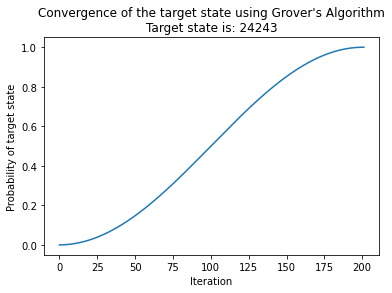

In [37]:
qubits = 16
wanted_state = random.randint(0, 2**qubits)
arr = np.arange(2**qubits)

def oracle(register):
    register.state_[wanted_state] *= -1
    return register.state_ 
    
register = QuantumRegister(qubits)
grovers = Grovers(oracle, arr, register)
probability = np.zeros(grovers.iterations + 1)
iterations = np.arange(grovers.iterations + 1)

grovers.register.setEqualSuperposition()

probability[0] = abs(grovers.register.state_[wanted_state])**2 

for i in range(grovers.iterations):
    grovers.applyOracle()
    grovers.flipByMean()
    probability[i+1] = grovers.register.getStateProbability(wanted_state) 

plt.plot(iterations, probability, "-")
plt.xlabel("Iteration")
plt.ylabel("Probability of target state")
plt.title(f"Convergence of the target state using Grover's Algorithm\nTarget state is: {wanted_state}")
plt.show()